# Explore here

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
import pickle

### Exploración y limpieza de datos

In [3]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/raw/diabetes.csv', sep = ',')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Obtener las dimensiones.
data.shape

(768, 9)

Observamos un dataset con 768 filas y 9 columnas.

In [5]:
# Obtener información sobre tipos de datos y valores no nulos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Todas las columnas del dataset contienen valores numéricos y no encontramos ningun valor nulo. 

#### Eliminar duplicados

In [6]:
# Verificar si hay duplicados y eliminarlos si los hubiese.
data.duplicated().sum()

np.int64(0)

No encontramos filas duplicadas en el dataset

#### Eliminar columnas sin relevancia

In [7]:
data_limpia = data

No observamos columnas que no sean relevantes en el dataset

### Paso 3: Análisis de variables univariante

#### Análisis sobre variables categóricas

No disponemos de variables categóricas en este dataset

#### Análisis sobre variables numéricas

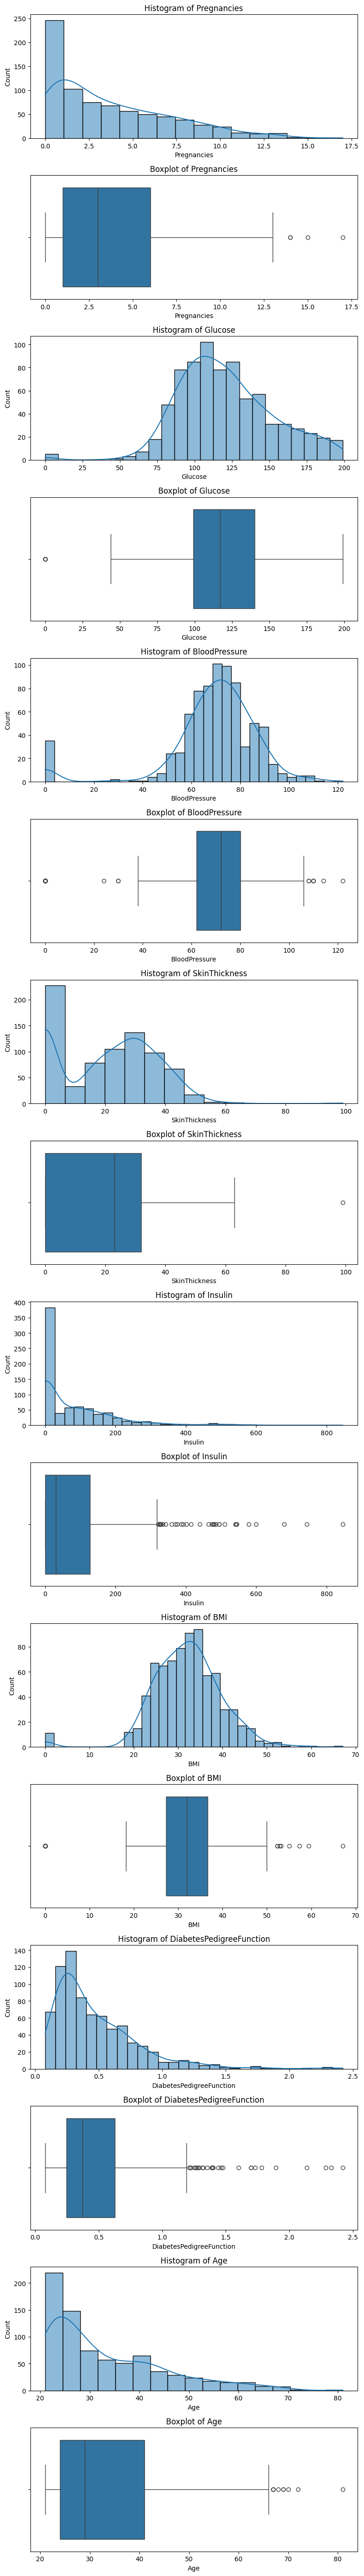

In [8]:
numericals_variables = data_limpia.select_dtypes(include = ['number']).drop(columns=['Outcome']).corr() # Con esta linea seleccionamos las columnas numericas del dataframe.

def plot_numericas(data_set, variables_numericas):
    
    # Crear la figura con 1 columnas y 2 filas por variable.
    fig, axis = plt.subplots(len(variables_numericas) * 2, 1, figsize=(8, len(variables_numericas) * 7))

    # Definir límites de los ejes x para cada par de gráficos (histograma y boxplot).
    # RECORDAR CAMBIAR LOS NOMBRES Y PONER LOS DE LAS COLUMNAS DE DF CORRESPONDIENTE.
    x_limits = {
        'age': (0, 100),   # Rango para el histograma y el boxplot de columna1...
        'duration': (0, 2000),    
        'campaign': (0, 20), 
        'pdays': (0, 2000),
           
        # Añadir más columnas y rangos si es necesario...
    }

    # Iterar sobre cada columna del DataFrame
    for i, col in enumerate(variables_numericas):
        index = i * 2
        # Histograma en la primera fila
        sns.histplot(data = data_set, x = col, kde = True, ax = axis[index])
        axis[index].set_title(f'Histogram of {col}')
        
        # Establecer límites del eje x para el histograma
        if col in x_limits:
            axis[index].set_xlim(x_limits[col])  # Asigna el rango de valores personalizado al histograma

        # Boxplot en la segunda fila
        sns.boxplot(data = data_set, x = col, ax = axis[index + 1])
        axis[index + 1].set_title(f'Boxplot of {col}')
        
        # Establecer límites del eje x para el boxplot (mismo rango que el histograma)
        if col in x_limits:
            axis[index + 1].set_xlim(x_limits[col])  # Asigna el mismo rango de valores al boxplot

    plt.tight_layout()
    plt.show()

plot_numericas(data_limpia, numericals_variables)


**Análisis de las variables numéricas**

- **Age**: Observamos una media de 28 años y edades que abarcan desde los 20 hasta los 80 años.
- **Pregnancies**: Una media de 3 embarazos por persona, y casos de personas mas peculiares que pueden alcanzar hasta los 12 embarazos. (Tener en cuneta que nos e especifica el sexo en el data set y entendemos que no todas las personas son mujeres). 
- **Glucose, BloodPressure**: Encontramos distribuciones normales en las variables.
- **BMI**: Observamos un BMI con una distribución normal y una media de 32 puntos.  

### Paso 4: Análisis de variables multivariante

#### Análisis numérico-numérico

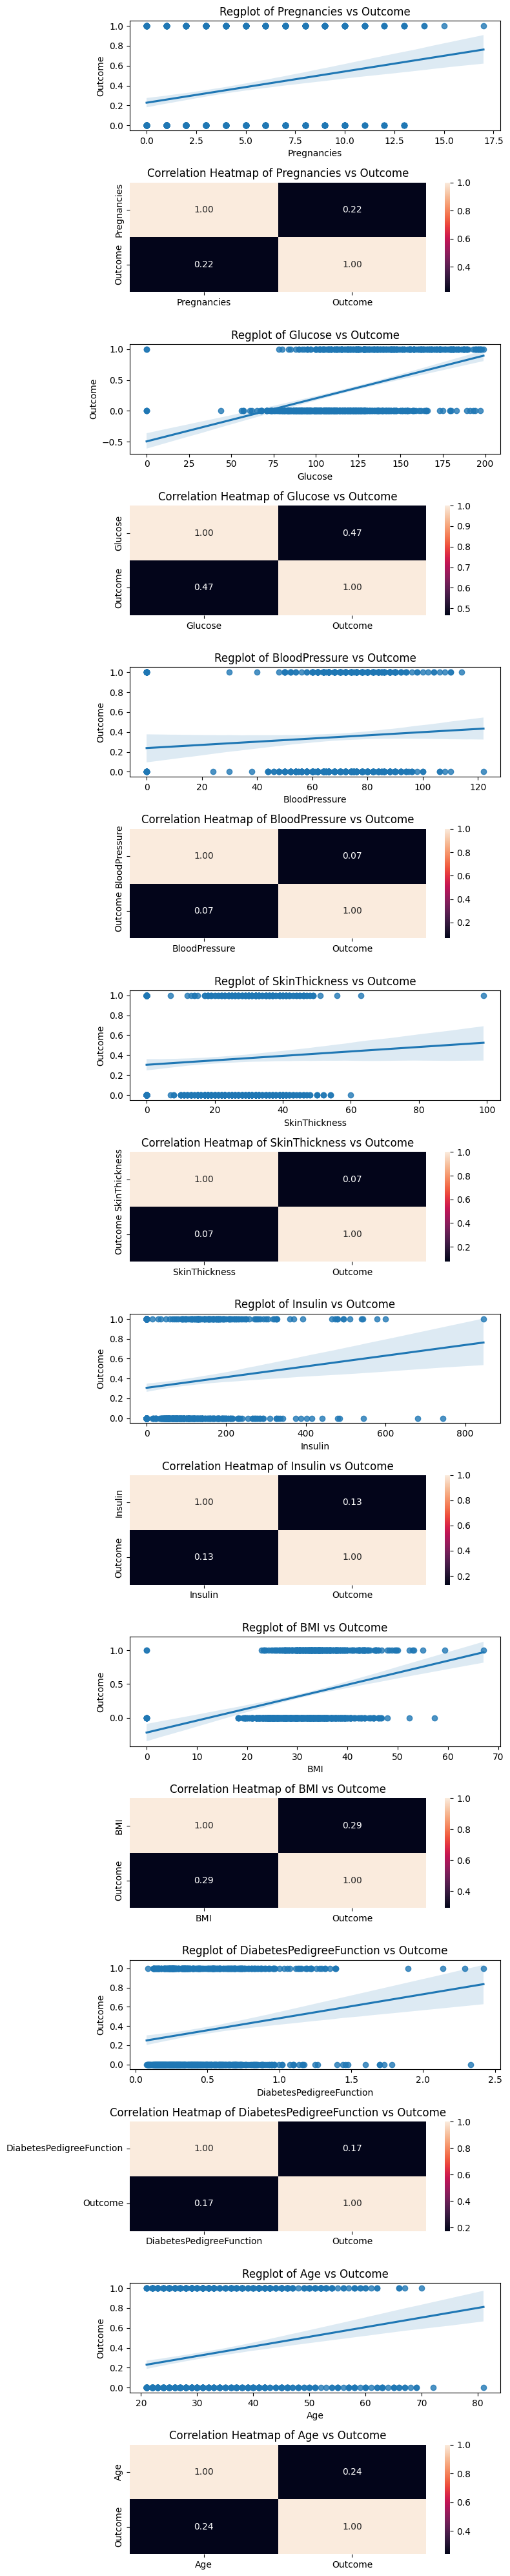

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:

numericals_variables = data_limpia.select_dtypes(include = ['number']).drop(columns=['Outcome']).corr() # Con esta linea seleccionamos las columnas numericas del dataframe.

  
def plot_numerico_numerico(data_set, variables_numericas):

    target = 'Outcome' # Recordar cambiar el target.     
    
    # Crear una figura con 1 columna y 2 filas por cada variable
    fig, axis = plt.subplots(len(variables_numericas) * 2, 1, figsize=(8, (len(variables_numericas) * 5)))

    # Crear un diagrama de dispersión múltiple                
    for i, col in enumerate(variables_numericas):

        # Regplot en la primera fila (fila 2 * i)
        sns.regplot(ax = axis[i * 2], data = data_set, x = col, y = target)
        axis[i * 2].set_title(f'Regplot of {col} vs {target}')
        
        # Heatmap en la segunda fila.
        sns.heatmap(data_set[[col, target]].corr(), annot = True, fmt = ".2f", ax = axis[i * 2 + 1], cbar = True)
        axis[i * 2 + 1].set_title(f'Correlation Heatmap of {col} vs {target}')

    plt.tight_layout()
    plt.show()

plot_numerico_numerico(data_limpia, numericals_variables)

data_limpia.head()

**Análisis numerico-numerico**

- **Glucose vs Outcome**: La relación más fuerte la observamos en la glucosa. Cuanto mas altos son los niveles de glucosa mas posibilidades tienes de padecer diabetes.  
- **Pregnancies vs Outcome**: Vemos una relacion no muy fuerte pero existente entre el numero de embarazos y las posibilidades de sufrir diabetes. 
- **BMI vs Outcome**: Observamos el mismo tipo de de relacion entre el indice de masa corporal y la posibilidad de sufrir diabetes.  
- **Age vs Outcome**: En la edad tambien observamos una relacion relevante. (Entre mas edad mas posibilidades de sufrir diabetes). 

En el resto de variables observamos relaciones mas debiles y conmenos relevancia. 

**Análisis de posibles relaciones entre variables numericas**

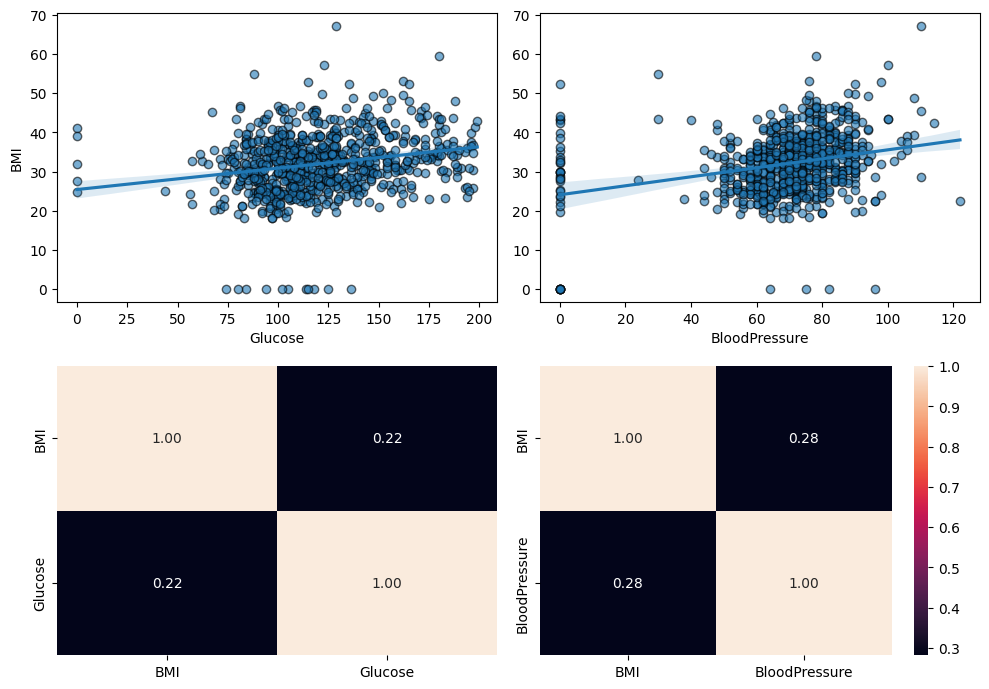

In [10]:

fig, axis = plt.subplots(2, 2, figsize = (10, 7))  

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data_limpia, x = "Glucose", y = "BMI", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.heatmap(data_limpia[["BMI", "Glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = data_limpia, x = "BloodPressure", y = "BMI", scatter_kws={'edgecolor': 'k', 'alpha': 0.6}).set(ylabel=None)
sns.heatmap(data_limpia[["BMI", "BloodPressure"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

plt.tight_layout()
plt.show()

Las relaciones entre el BMI y la glucosa o la presión sanguinea no son muy elevadas.  

#### Análisis categórico-categórico

No disponemos de variables categóricas en este dataset

#### Combinaciones de la clase con varias predictoras

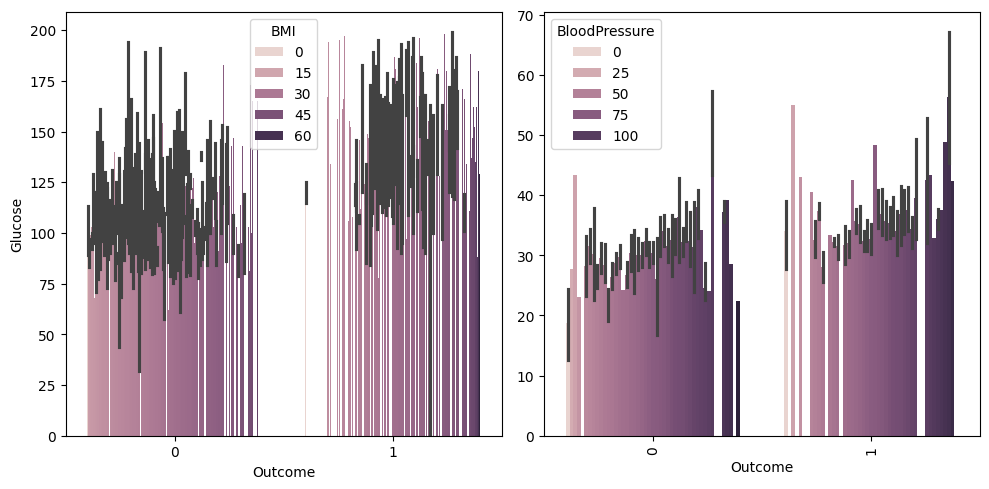

In [11]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = data_limpia, x = "Outcome", y = 'Glucose', hue = 'BMI')

sns.barplot(ax = axis[1], data = data_limpia, x = "Outcome", y = 'BMI', hue = 'BloodPressure').set(ylabel = None)
for tick in axis[1].get_xticklabels():
    tick.set_rotation(90)

plt.tight_layout()
plt.show()

##### Análisis de correlaciones. 

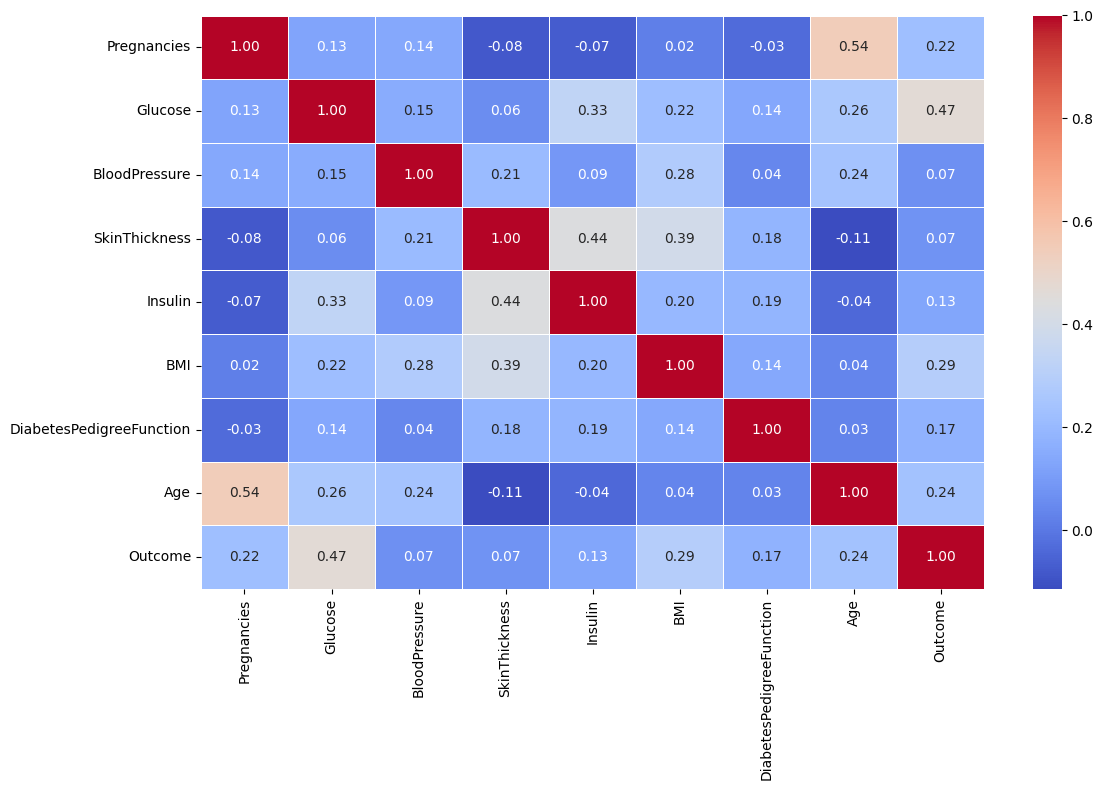

In [12]:
def plot_matriz_correlacion(data_set):

    corr_matrix = data_set.select_dtypes(include = ['number']).corr() # Con esta linea seleccionamos las columnas numericas del dataframe.

    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot = True, fmt = ".2f", linewidths = 0.5, cmap = "coolwarm")

    plt.tight_layout()
    plt.show()

plot_matriz_correlacion(data_limpia)

La matriz de correlaciones nos muestra relaciones mas bien debiles a excepción de algunas mas fuertes que eran de esperar ya que las habiamos podido observar en los analisis previos, como son la relacion directa entre la edad y el numero de embarazos, la relacion directa entre la glucosa y la posibilidad de padecer diabetes, y las relaciones entre el BMI y los niveles de insulina con la variable SkinThickness. 

El resto de variables poseen relaciones mas debiles y de poca relevancia al parecer. 


#### Una vez analizada la correlación, analicemos los dos casos vistos para corroborar la teoría:

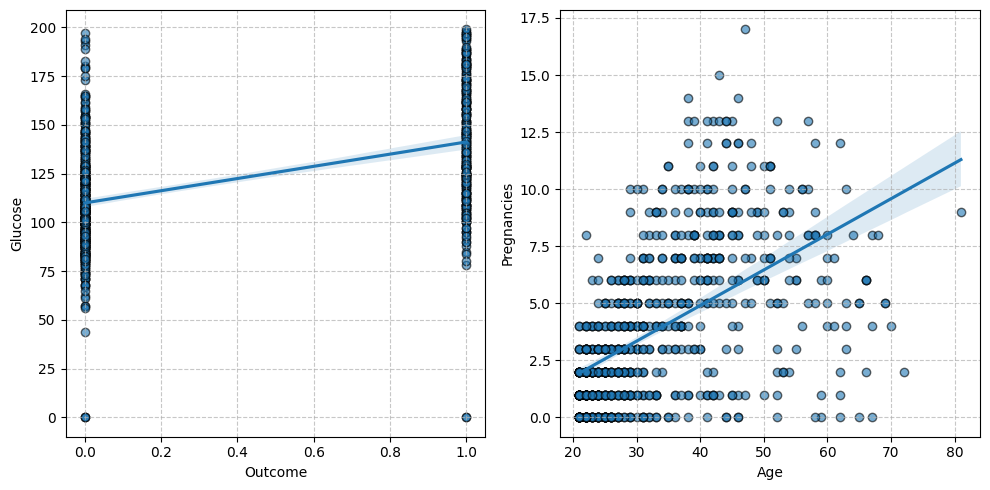

In [13]:
# Una vez analizada la correlación, analicemos los dos casos vistos para corroborar la teoría:

fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = data_limpia, x = "Outcome", y = "Glucose", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.regplot(ax = axis[1], data = data_limpia, x = "Age", y = "Pregnancies", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
axis[0].grid(linestyle='--', alpha=0.7)
axis[1].grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

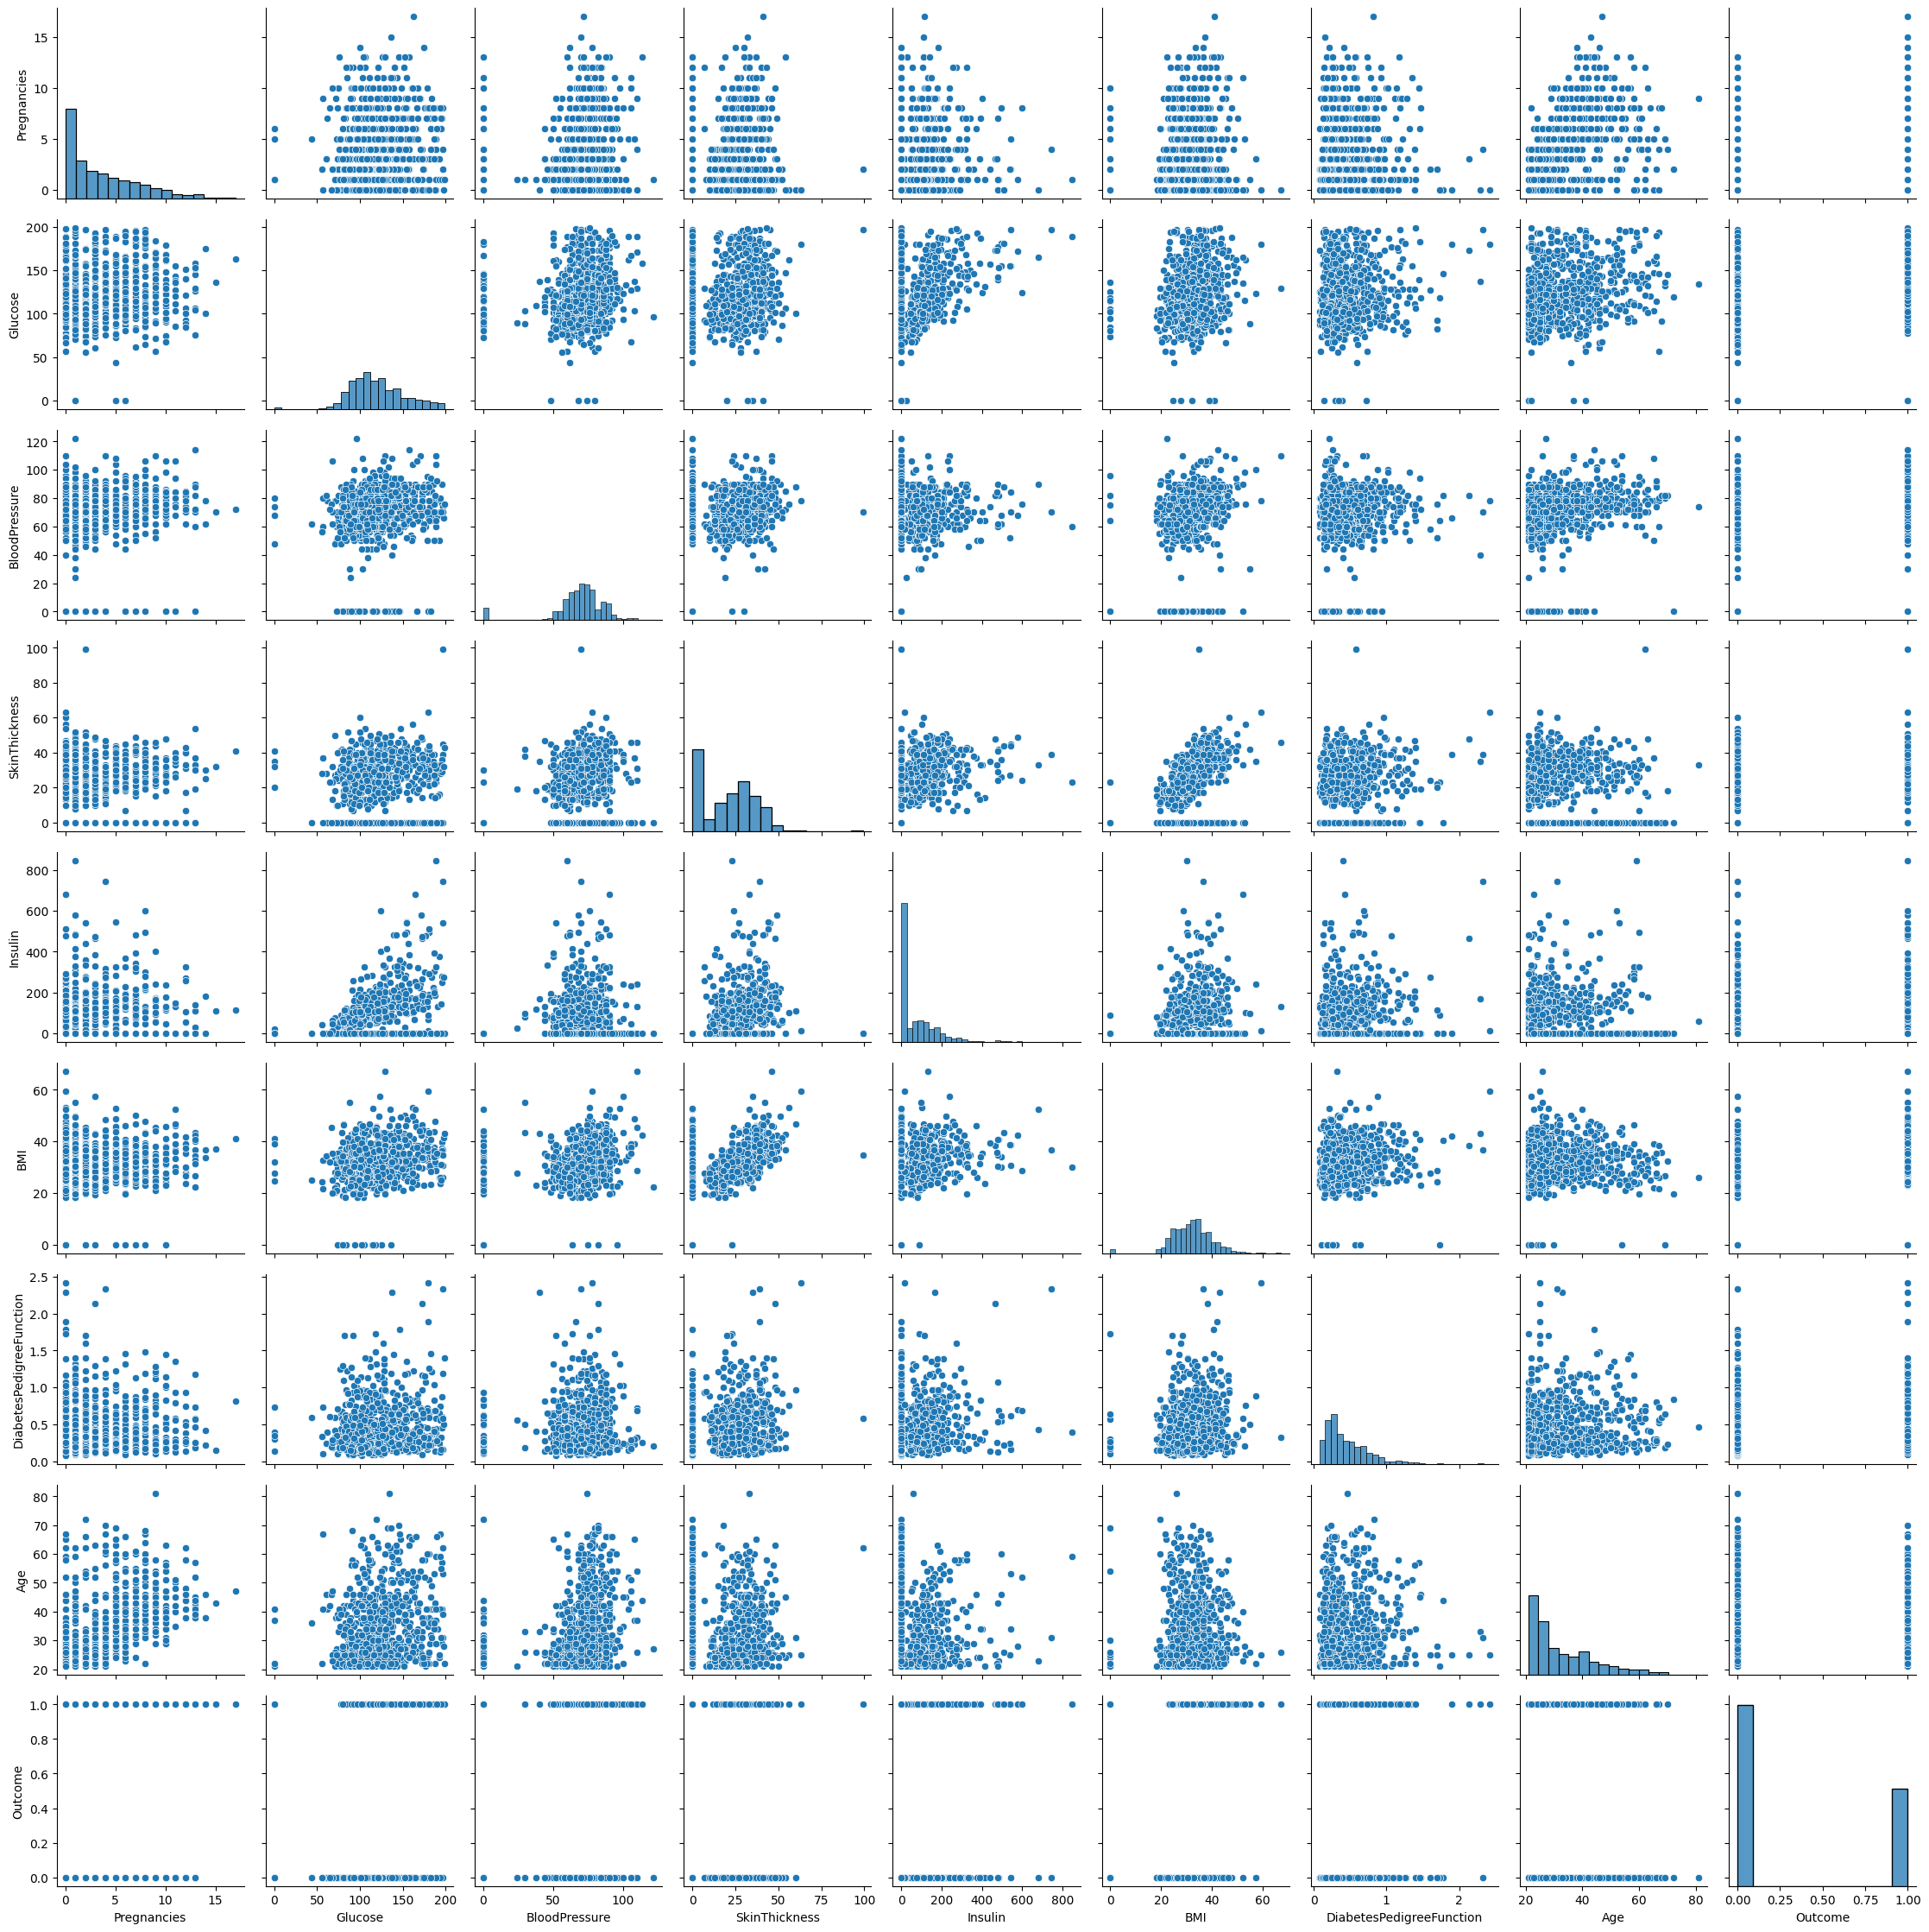

In [14]:
# graficar el pairplot.

sns.pairplot(data = data_limpia)

plt.tight_layout()
plt.show()

### Paso 5: Ingeniería de características

#### Análisis de outliers

In [15]:
data_limpia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Boxplots para visualizar los outliers

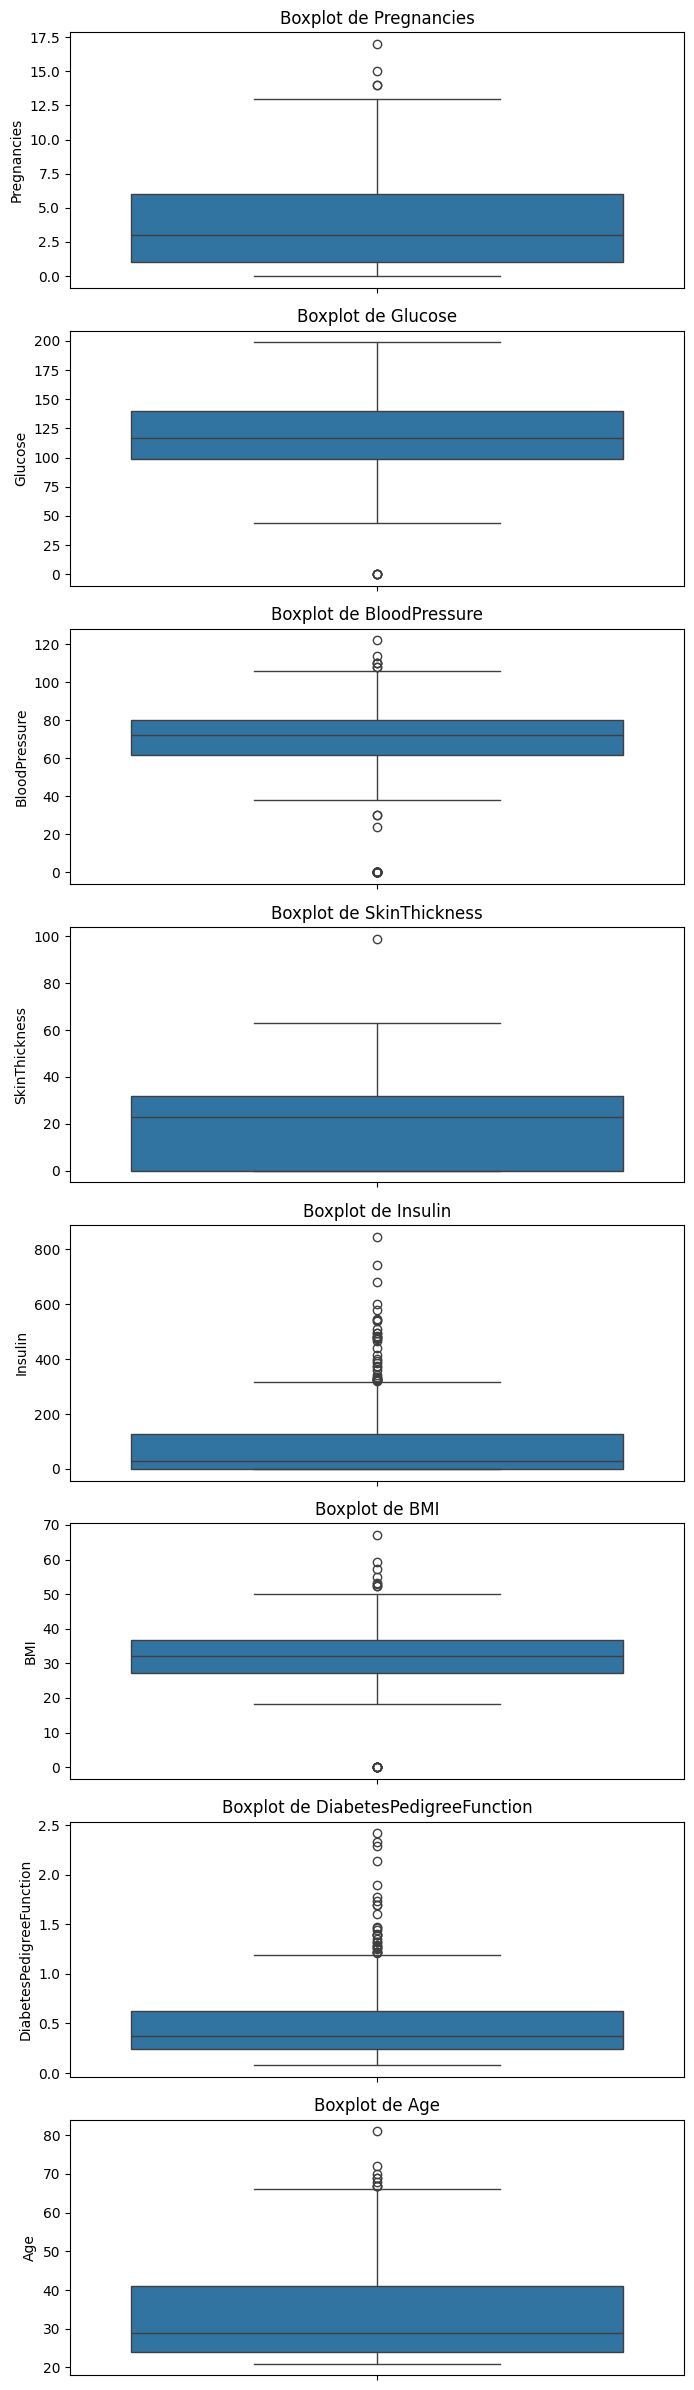

In [16]:
def plot_boxplots_numericos(data_set):
    # Esta variable filtrará el data frame y me devolverá los nombres de las columnas numericas. 
    
    column_filter_numericas = data_set.select_dtypes(include = 'number').drop(columns = ['Outcome'], errors='ignore').columns # Si quiero eliminar alguna columna rellenar la parte de drop.
    # Crear el gráfico con subgráficas en una sola columna
    fig, axis = plt.subplots(len(column_filter_numericas), 1, figsize=(7, len(column_filter_numericas) * 3))
     
    # Si solo hay una columna, `axis` no es un array, lo convertimos en uno
    if len(column_filter_numericas) == 1:
        axis = [axis]
    
    # Generar los boxplots para cada columna numérica.
    for i, columna in enumerate(column_filter_numericas):
        sns.boxplot(ax = axis[i], data = data_set, y = columna)
        axis[i].set_title(f'Boxplot de {columna}')
    
    plt.tight_layout()
    plt.show()

plot_boxplots_numericos(data_limpia)

#### Separación del Dataset en uno con outliers y otro sin outliers

In [17]:
# Separar mi data frame en uno con outliers y otro sin outliers.
# Funcion que remplaza los outliers y me devuelve una copia del data frame sin outliers, pero que ademas tambien me devuelve la lista de 
# limites de outliers para luego merterlas en un diccionario.

data_limpia_con_outliers = data_limpia.copy()
data_limpia_sin_outliers = data_limpia.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = 0
  
  # Replace upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Replace lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)

  return df.copy(), [lower_limit, upper_limit]


# Crear diccionario con los limites de outliers para poder guardarlos y a la vez llamar a la funcion para que convierta la copia del 
# dataframe a sin outliers y tener las dos variables con cada dataframe (el con y el sin) disponibles para los siguientes pasos. 

outliers_dict = {}

for column in ['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age'	]: # RECORDAR CAMBIAR LAS COLUMNAS. 
  data_limpia_sin_outliers, limits_list = replace_outliers_from_column(column, data_limpia_sin_outliers)
  outliers_dict[column] = limits_list

# Guardar el diccionario en un archivo json.  

with open("outliers_replacement.json", "w") as f:
    json.dump(outliers_dict, f)

outliers_dict

{'Pregnancies': [0, np.float64(13.5)],
 'Glucose': [np.float64(37.125), np.float64(202.125)],
 'BloodPressure': [np.float64(35.0), np.float64(107.0)],
 'SkinThickness': [0, np.float64(80.0)],
 'Insulin': [0, np.float64(318.125)],
 'BMI': [np.float64(13.35), np.float64(50.550000000000004)],
 'DiabetesPedigreeFunction': [0, np.float64(1.2)],
 'Age': [0, np.float64(66.5)]}

#### Análisis de valores faltantes

In [18]:
data_limpia_con_outliers.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
data_limpia_sin_outliers.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### IMPORTANTE

En este caso no encontramos valores faltantes en ninguno de los dos data set (data_limpia_con_outliers, data_limpia_sin_outliers), si no fuese este el caso, y tuviesemos que lidiar con ellos lo hariamos de la siguiente manera.  

total_data["Age"].fillna(total_data["Age"].median(), inplace = True)

total_data["Embarked"].fillna(total_data["Embarked"].mode()[0], inplace = True) # RECORDANDO QUE MODE PARA LAS VARIABLES CATEGORICAS

total_data["Fare"].fillna(total_data["Fare"].mean(), inplace = True) # Y MEDIA PARA LAS VARIABLES NUMERICAS

total_data.isnull().sum()

#### Inferencia de nuevas características

No observamos en el data set ninguna variable con la que seria relevante hacer inferencia de una nueva característica. 

#### Escalado de valores

In [20]:
# Escalado de valores:

# Separar 'x_con_outliers' y 'x_sin_outliers' e 'Y' en train y test. (resultante 6 excels). 

num_variables = data_limpia.select_dtypes(include = 'number').drop(columns = ['Outcome'], errors='ignore').columns # Si quiero eliminar alguna columna rellenar la parte de drop.

# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = data_limpia_con_outliers.drop("Outcome", axis = 1)[num_variables]
X_sin_outliers = data_limpia_sin_outliers.drop("Outcome", axis = 1)[num_variables]
y = data_limpia_con_outliers["Outcome"]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)

# GUARDAR LOS DATASETS
X_train_con_outliers.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_train_sin_outliers.xlsx", index = False)
X_test_con_outliers.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_test_sin_outliers.xlsx", index = False)
y_train.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/y_train.xlsx", index = False)
y_test.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/y_test.xlsx", index = False)

X_train_con_outliers.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


##### Normalización

In [21]:
# Normalización:

from sklearn.preprocessing import StandardScaler
import pickle

num_variables = data_limpia.select_dtypes(include = 'number').drop(columns = ['Outcome'], errors='ignore').columns # Si quiero eliminar alguna columna rellenar la parte de drop.

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)   

with open("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Models(Norm_scal)/normalizador_con_outliers.pkl", "wb") as file: # Guardar el Normalizador. 
  pickle.dump(normalizador_con_outliers, file)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_test_con_outliers_norm.xlsx", index = False)
### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

with open("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Models(Norm_scal)/normalizador_sin_outliers.pkl", "wb") as file: # Guardar el Normalizador. 
  pickle.dump(normalizador_sin_outliers, file)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_test_sin_outliers_norm.xlsx", index = False)

X_train_con_outliers_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,-0.526397,-1.151398,-3.752683,-1.322774,-0.701206,-4.135256,-0.490735,-1.035940
618,1.588046,-0.276643,0.680345,0.233505,-0.701206,-0.489169,2.415030,1.487101
346,-0.828460,0.566871,-1.265862,-0.090720,0.013448,-0.424522,0.549161,-0.948939
294,-1.130523,1.254179,-1.049617,-1.322774,-0.701206,-1.303720,-0.639291,2.792122
231,0.681856,0.410665,0.572222,1.076490,2.484601,1.838121,-0.686829,1.139095


##### Escalado Mínimo-Máximo

In [22]:
# Escalado Mínimo-Máximo:

from sklearn.preprocessing import MinMaxScaler

num_variables = data_limpia.select_dtypes(include = 'number').drop(columns = ['Outcome'], errors='ignore').columns # Si quiero eliminar alguna columna rellenar la parte de drop.

### ESCALAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

with open("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Models(Norm_scal)/scaler_con_outliers.pkl", "wb") as file: # Guardar el Escaler. 
  pickle.dump(scaler_con_outliers, file)
  
X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_scal.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_train_con_outliers_scal.xlsx", index = False)
X_test_con_outliers_scal.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_test_con_outliers_scal.xlsx", index = False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

with open("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Models(Norm_scal)/scaler_sin_outliers.pkl", "wb") as file: # Guardar el Escaler. 
  pickle.dump(scaler_sin_outliers, file)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_scal.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_train_sin_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_test_sin_outliers_scal.xlsx", index = False)

X_train_con_outliers_scal.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,0.117647,0.422111,0.000000,0.000000,0.000000,0.000000,0.096499,0.000000
618,0.529412,0.562814,0.672131,0.380952,0.000000,0.420268,0.514091,0.483333
346,0.058824,0.698492,0.377049,0.301587,0.098109,0.427720,0.245944,0.016667
294,0.000000,0.809045,0.409836,0.000000,0.000000,0.326379,0.075149,0.733333
231,0.352941,0.673367,0.655738,0.587302,0.437352,0.688525,0.068318,0.416667


### Feature Selection

Este paso se ha realizado posteriormente a obserbar los primeros resultados del machine learning, los cuales han ofrecido la necesidad de hacerlo. 

In [23]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 4 decimos implícitamente que queremos eliminar 1 característica1 del conjunto de datos.

selection_model = SelectKBest(f_classif, k = 7)
selection_model.fit(X_train_con_outliers, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_con_outliers), columns = X_train_con_outliers.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_con_outliers), columns = X_test_con_outliers.columns.values[ix])

# GUARDO X_train_sel.columns

columns_list = X_train_sel.columns.tolist() # Convierte el objeto Index a una lista.tolist()

with open("feature_selection_k_7.json", "w") as f:
  json.dump(columns_list, f)

X_train_sel.head()

# GUARDAR LOS DATASETS
X_train_sel.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_train_sel_k7.xlsx", index = False)
X_test_sel.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_test_sel_k7.xlsx", index = False)